#Polycystic Ovary Syndrome (PCOS) detection using Machine Learning

## Data pre-processing

### Importing modules and libraries

In [6]:
# importing sys, numpy and pandas

import sys
import pandas as pd
import numpy as np

In [7]:
# importing matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

In [8]:
# importing seaborn

import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

In [9]:
# disabling warnings

import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [10]:
# mounting to google drive folder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# loading the PCOS dataset

pcos_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PCOS/Datasets/PCOS_Dataset.csv')
pcos_df.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
Sl. No,1,2,3,4,5,6,7,8,9,10,11,12
Patient File No.,1,2,3,4,5,6,7,8,9,10,11,12
PCOS (Y/N),0,0,1,0,0,0,0,0,0,0,0,0
Age (yrs),28,36,33,37,25,36,34,33,32,36,20,26
Weight (Kg),44.6,65.0,68.8,65.0,52.0,74.1,64.0,58.5,40.0,52.0,71.0,49.0
Height(Cm),152.0,161.5,165.0,148.0,161.0,165.0,156.0,159.0,158.0,150.0,163.0,160.0
BMI,19.3,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?
Blood Group,15,15,11,13,11,15,11,13,11,15,15,13
Pulse rate(bpm),78,74,72,72,72,78,72,72,72,80,80,72
RR (breaths/min),22,20,18,20,18,28,18,20,18,20,20,20


In [12]:
# checking the details of the loaded data frame

pcos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    object 
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

### Exploring data

### Checking and removing null values

In [13]:
# checking for null values

pcos_df.isnull()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
537,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
538,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
539,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
# checking total number of null values in each field

pcos_df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [15]:
# drop the column containing almost all null values named 'Unnamed: 44'

pcos_df = pcos_df.drop(columns='Unnamed: 44')

In [16]:
# drop unnecessary and non useful columns like 'Sl. No' and 'Pateient File No.'

pcos_df = pcos_df.drop(columns=['Sl. No','Patient File No.'])

In [17]:
# printing first 12 rows in the data frame

pcos_df.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
PCOS (Y/N),0,0,1,0,0,0,0,0,0,0,0,0
Age (yrs),28,36,33,37,25,36,34,33,32,36,20,26
Weight (Kg),44.6,65.0,68.8,65.0,52.0,74.1,64.0,58.5,40.0,52.0,71.0,49.0
Height(Cm),152.0,161.5,165.0,148.0,161.0,165.0,156.0,159.0,158.0,150.0,163.0,160.0
BMI,19.3,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?
Blood Group,15,15,11,13,11,15,11,13,11,15,15,13
Pulse rate(bpm),78,74,72,72,72,78,72,72,72,80,80,72
RR (breaths/min),22,20,18,20,18,28,18,20,18,20,20,20
Hb(g/dl),10.48,11.7,11.8,12.0,10.0,11.2,10.9,11.0,11.8,10.0,10.0,9.5
Cycle(R/I),2,2,2,2,2,2,2,2,2,4,2,2


### Handling missing values

**Drop rows with null values**

In [18]:
# drop rows with null values

pcos_df.dropna(axis=0, inplace=True)

In [19]:
# checking total number of null values in each field

pcos_df.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [20]:
# checking the details of the updated data frame

pcos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              539 non-null    int64  
 1    Age (yrs)              539 non-null    int64  
 2   Weight (Kg)             539 non-null    float64
 3   Height(Cm)              539 non-null    float64
 4   BMI                     539 non-null    object 
 5   Blood Group             539 non-null    int64  
 6   Pulse rate(bpm)         539 non-null    int64  
 7   RR (breaths/min)        539 non-null    int64  
 8   Hb(g/dl)                539 non-null    float64
 9   Cycle(R/I)              539 non-null    int64  
 10  Cycle length(days)      539 non-null    int64  
 11  Marraige Status (Yrs)   539 non-null    float64
 12  Pregnant(Y/N)           539 non-null    int64  
 13  No. of aborptions       539 non-null    int64  
 14    I   beta-HCG(mIU/mL)  539 non-null    fl

**Updating corrupted values**

In [21]:
# printing current data frame

pcos_df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,#NAME?,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,#NAME?,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,#NAME?,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,#NAME?,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.3,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.4,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.2,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


*We can see that the BMI column contains corrupted values.
Let's update the BMI values using the following formula*

`BMI = (Weight in kg / (Height in cm ^ 2)) x 10000`

In [22]:
# calculating BMI

pcos_df['BMI'] = (pcos_df['Weight (Kg)'] / (pcos_df['Height(Cm) '])**2)*10000
pcos_df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.304017,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.456637,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.316456,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.372576,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.222222,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [23]:
# updating 'FSH/LH' values

pcos_df.loc[:,"FSH/LH"] = pcos_df.loc[:,"FSH(mIU/mL)"] / pcos_df.loc[:,"LH(mIU/mL)"];
pcos_df.loc[:,"FSH/LH"] = pcos_df.loc[:,"FSH/LH"].round(2);

In [24]:
# updating 'Waist:Hip Ratio' values

pcos_df.loc[:,"Waist:Hip Ratio"] = pcos_df.loc[:,"Waist(inch)"] / pcos_df.loc[:,"Hip(inch)"]
pcos_df.loc[:,"Waist:Hip Ratio"] = pcos_df.loc[:,"Waist:Hip Ratio"].round(2)

In [25]:
# printing first 12 rows in the data frame

pcos_df.head(12)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.304017,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
5,0,36,74.1,165.0,27.217631,15,78,28,11.20,2,...,0,0.0,0,110,70,9,6,16.0,20.0,8.0
6,0,34,64.0,156.0,26.298488,11,72,18,10.90,2,...,0,0.0,0,120,80,6,6,15.0,16.0,6.8
7,0,33,58.5,159.0,23.139907,13,72,20,11.00,2,...,0,0.0,0,120,80,7,6,15.0,18.0,7.1
8,0,32,40.0,158.0,16.023073,11,72,18,11.80,2,...,0,0.0,0,120,80,5,7,17.0,17.0,4.2
9,0,36,52.0,150.0,23.111111,15,80,20,10.00,4,...,0,0.0,0,110,80,1,1,14.0,17.0,2.5


In [26]:
# checking the details of the updated data frame

pcos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              539 non-null    int64  
 1    Age (yrs)              539 non-null    int64  
 2   Weight (Kg)             539 non-null    float64
 3   Height(Cm)              539 non-null    float64
 4   BMI                     539 non-null    float64
 5   Blood Group             539 non-null    int64  
 6   Pulse rate(bpm)         539 non-null    int64  
 7   RR (breaths/min)        539 non-null    int64  
 8   Hb(g/dl)                539 non-null    float64
 9   Cycle(R/I)              539 non-null    int64  
 10  Cycle length(days)      539 non-null    int64  
 11  Marraige Status (Yrs)   539 non-null    float64
 12  Pregnant(Y/N)           539 non-null    int64  
 13  No. of aborptions       539 non-null    int64  
 14    I   beta-HCG(mIU/mL)  539 non-null    fl

### Replace irrelevant values

*We can see that values in Cycle(R/I) are mainly 2 and 4. Also some values are 5. So let's update 5 to 4 first and then update 2 to 0 and 4 to 1 respectively.*

In [27]:
# updating 'Cycle(R/I)'

pcos_df["Cycle(R/I)"].replace({5: 4}, inplace=True)
pcos_df["Cycle(R/I)"].replace({2: 0, 4: 1}, inplace=True)

*Similarly replacing '1.99' to 1.99 in 'II    beta-HCG(mIU/mL)' column*

In [28]:
# updating 'II beta-HCG(mIU/mL)'

pcos_df["II    beta-HCG(mIU/mL)"].replace({"1.99.": 1.99}, inplace=True)

In [29]:
# converting 'II beta-HCG(mIU/mL)' to float type

pcos_df["II    beta-HCG(mIU/mL)"] = pcos_df["II    beta-HCG(mIU/mL)"].astype(float)

In [30]:
# updating 'BP _Systolic (mmHg)' and 'BP _Diastolic (mmHg)'

pcos_df["BP _Systolic (mmHg)"].replace({12: 120}, inplace=True)
pcos_df["BP _Diastolic (mmHg)"].replace({8: 80}, inplace=True)

*We can see that the column 'AMH(ng/mL)' contains value 'a' in one row. Let's drop the row.*

In [31]:
# print the row where value of AMH(ng/mL) is equal to 'a'

pcos_df[pcos_df["AMH(ng/mL)"] == "a"].T

,305
PCOS (Y/N),0
Age (yrs),37
Weight (Kg),56.0
Height(Cm),152.0
BMI,24.238227
Blood Group,13
Pulse rate(bpm),74
RR (breaths/min),20
Hb(g/dl),11.7
Cycle(R/I),0


In [32]:
# dropping the row where 'AMH(ng/mL)' is 'a'

pcos_df.drop(pcos_df.loc[pcos_df["AMH(ng/mL)"] == "a"].index, inplace=True);

In [33]:
# checking if the row has been dropped successfully

pcos_df[pcos_df["AMH(ng/mL)"] == "a"]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)


In [34]:
# converting 'AMH(ng/mL)' to float type

pcos_df["AMH(ng/mL)"] = pcos_df["AMH(ng/mL)"].astype(float)

In [35]:
# checking the info of the updated data frame

pcos_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              538 non-null    int64  
 1    Age (yrs)              538 non-null    int64  
 2   Weight (Kg)             538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   Cycle(R/I)              538 non-null    int64  
 10  Cycle length(days)      538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of aborptions       538 non-null    int64  
 14    I   beta-HCG(mIU/mL)  538 non-null    fl

## Visualize the count

0    362
1    176
Name: PCOS (Y/N), dtype: int64


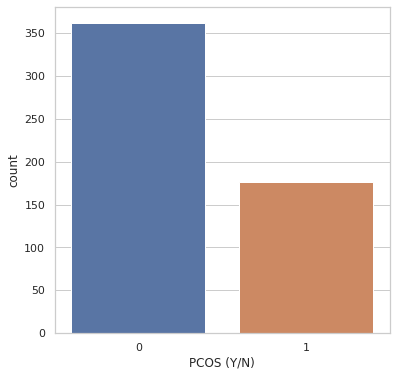

In [36]:
print(pcos_df['PCOS (Y/N)'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='PCOS (Y/N)',
    data=pcos_df
);

## Saving cleaned dataset

In [37]:
# saving the cleaned dataset to google cloud location

pcos_df.to_csv('/content/drive/My Drive/Colab Notebooks/PCOS/Datasets/PCOS_Clean_Dataset.csv', index=False)